# Dimensionality Reduction and Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

## Use Principle Component Analysis (PCA) to reduce dimensionality


For this assigntment we will use PCA to analyze the MNIST data set. PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. Since the MNIST data set has 70000 dimentions using PCA will allow us to reduce the dementionality to the 2 most important variables. We will be able to explore and visualize the data more clearly. 

In [3]:
print(X.shape)

(70000, 784)


In [4]:
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA


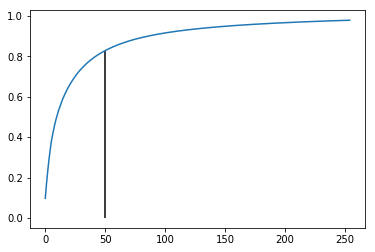

In [5]:

pca = PCA(n_components=255)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[50],x=50)

This graph uses the elbow method and shows us that 50 components is the optimal number of components so we will update our PCA model. 

Text(0.5,0,'2nd Component')

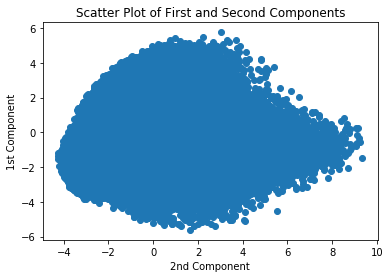

In [6]:
#scatter plot of the first 2 components
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('Scatter Plot of First and Second Components')
plt.ylabel('1st Component')
plt.xlabel('2nd Component')

The scatter plot shows us how spread out the data are in the 2 main projections. It appears that the first component is more dense at the begining and that the second component is more equally spread. 

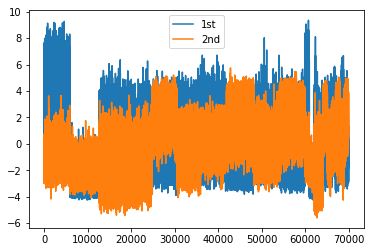

In [7]:
plt.plot(X_pca[:,0], label = '1st')
plt.plot(X_pca[:,1], label = '2nd')
plt.legend()

This graph shows the pca of component 1 and component 2 across all 70,000 images and it confirms the intuition of the previous graph. 

Typically, PCA is used when you have too many features to analyze the problem properly. Additional features can increase the variance in the data but it can also lead to over fitting and auto correlation. PCA is method that allows you to pick the most important combinations of features. A draw back to PCA is that it reduces the variance in the data and you are subject to losing intuition. 

For this problem with the MNIST data set, PCA is useful because intuition isn't that important. However, if you are trying to make predictions you would want to know the most important features instead of letting PCA automatically choose them. 

Text(0.5,1,'Handwritten Digit')

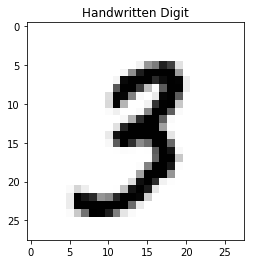

In [8]:
plt.imshow(X[21014].reshape((28,28)), cmap = 'Greys')
plt.title('Handwritten Digit')

In [9]:
pca = PCA(n_components = 50)
X_pca = pca.fit_transform(X)
compressed_X = pca.inverse_transform(X_pca)

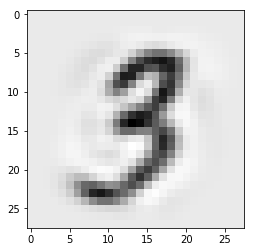

In [10]:
plt.imshow(compressed_X[21014].reshape((28,28)), cmap = 'Greys')

Compressing the image using PCA and replotting the image yeilds a similar but blurry result. Adding more components to the PCA would most likely increase the clarity of the image. 

## t-SNE

Now we will plot the first 2 components using t-SNE

In [11]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.033s...
[t-SNE] Computed neighbors for 10000 samples in 9.444s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.918984
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.436661
[t-SNE] Error after 1000 iterations: 1.678278


In [15]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

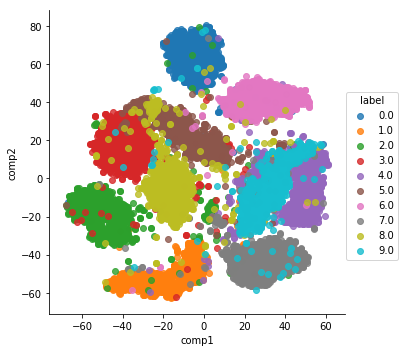

In [17]:
import seaborn as sns
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

## K-Means 


In [18]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [19]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(X[rows[:n_select],:])
sk_clusters = kmeans.predict(X)

Text(0.5,1,'T-SNE Visualization')

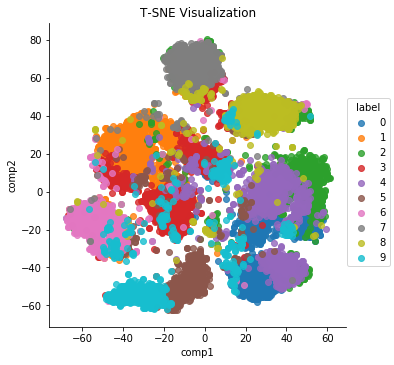

In [20]:
cluster_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
cluster_tsne['label'] = sk_clusters[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=cluster_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title('T-SNE Visualization')

In [21]:
print(silhouette_score(cluster_tsne[['comp1', 'comp2']], sk_clusters[rows[:n_select]], metric='euclidean'))

0.165487
